<a href="https://colab.research.google.com/github/juanmanuelvillacis/lab-unsupervised-learning-deepdive/blob/master/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Network Segmentation Analysis

In this exercise, we will try to identify different groups of teenagers based on their personal preferences using an unsupervised learning model.  
  
Start by importing your libraries, loading the dataset and exploring its variables.  
What features do you find? Do they have the correct datatypes?

In [401]:
#Import your libraries here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn.cluster as cluster 
import scipy.cluster.hierarchy as hierarchy
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [402]:
from sklearn.decomposition import PCA

In [403]:
#Load the dataset and explore its variables
df = pd.read_csv('/content/drive/MyDrive/Iron Hack/LABs/csv_docs/snsdata.csv')
df


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

## 1. Data Wrangling

If you found in the last step that there are variables that need to be dealt with before we can start our analysis, please do it. Comment your code and take us through the steps of your thinking.  

Consider the some of these aspects:  
* Wrong data types
* Null values
* Consistency in categorical data

In [405]:
df.dropna(inplace=True,axis=0)

In [406]:
df.isna().sum()

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

In [407]:
df['gender'] = [1 if a =='M' else 0 for a in df['gender']]

In [408]:
#df['age'] = [int(a) for a in df['age']]

In [409]:
df.describe()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000,24005.000000
mean,2007.484524,0.195543,17.951418,30.760966,0.276526,0.266236,0.227911,0.167548,0.146178,0.136888,0.108311,0.112727,0.087232,0.147844,0.332181,0.217038,0.144095,0.129640,0.106353,0.433326,0.312185,0.043241,0.765882,0.254739,0.477859,0.258404,0.110769,0.021121,0.438242,0.115434,0.105228,0.267403,0.362549,0.152510,0.070444,0.052989,0.188086,0.118892,0.092106,0.064403
std,1.116067,0.396626,7.625351,36.368500,0.814345,0.720804,0.928364,0.746042,0.656390,0.524527,0.518625,0.549536,0.511138,0.484741,0.817428,1.187988,0.529837,0.484924,0.520592,1.180589,1.084662,0.296702,1.207932,0.741818,1.336075,0.862050,0.548227,0.193018,1.126030,0.455261,2.159181,0.713282,0.731995,0.479919,0.351271,0.285502,0.622570,0.440071,0.410725,0.363771
min,2006.000000,0.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,0.000000,16.309000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.000000,17.287000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,0.000000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,1.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,13.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,30.000000,34.000000,11.000000,27.000000,21.000000,79.000000,44.000000,29.000000,8.000000,37.000000,9.000000,327.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


## 2. Data Visualization

Now that the data is more or less fixed, plot some charts to understand better how it is composed:  
* Check distribution of variables - do we have outliers? What should we do with them?
* Understand which features are correlated - do they represent the same? Which ones should we keep?
* When we compare two variables, is it possible to see groups in the data?
* Given the dimension of the dataset, would it be useful to perform dimension reduction in some variables? Which ones would you group?

Comment your ideas based on the visualizations you made and other data exploration. What will be your next steps before modeling?

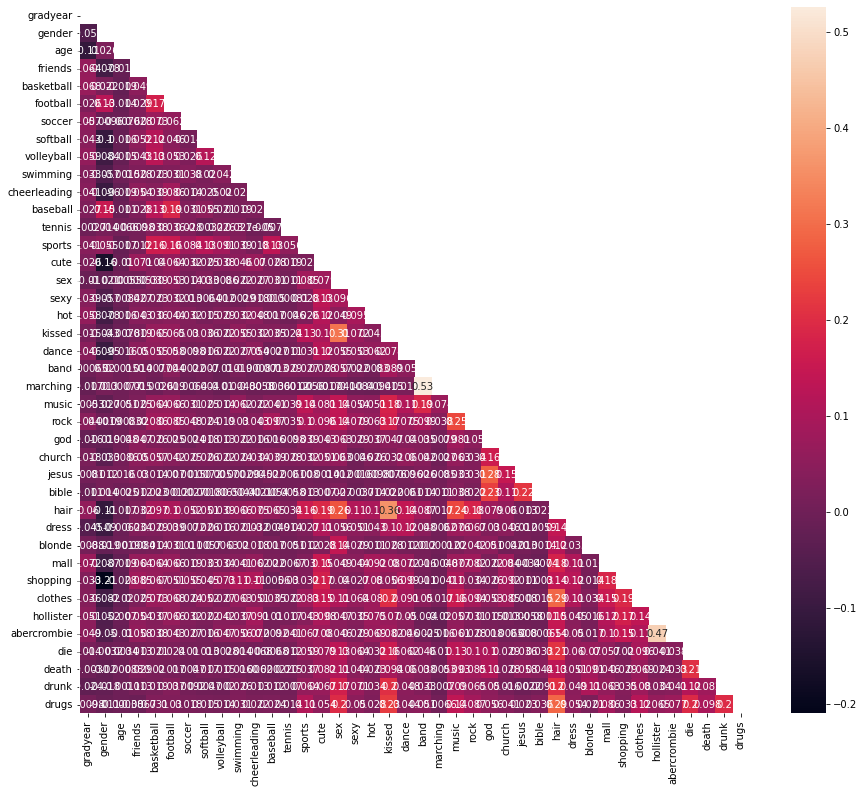

In [410]:
plt.figure(figsize=(15,13))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), mask=mask, annot=True);

In [411]:
# By the corr matrix the column Band and Abercrombie must be droped
df.drop(columns=['abercrombie','band'],inplace=True)

In [412]:
cols=df.columns
for i in cols[3:]:
    indexNames= df[ (df [i] >= 101)].index
    df.drop(indexNames , inplace=True)
    
df.reset_index(inplace=True,drop=True)

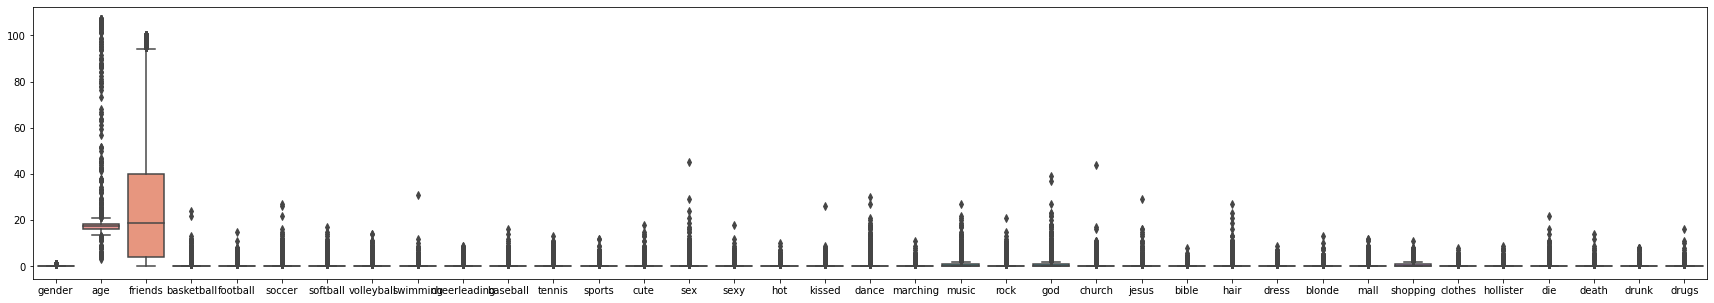

In [413]:
plt.figure(figsize=(30,5))

stats_df = df.drop(['gradyear'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

In [414]:
# Removing outliers
'''
df_clean = df.iloc[:,3:][(np.abs(stats.zscore(df.iloc[:,3:])) < 4).all(axis=1)]
df_clean['gradyear'] = df['gradyear']
df_clean['friends'] = df['friends']
df_clean.iloc[:,3:].boxplot()
'''

"\ndf_clean = df.iloc[:,3:][(np.abs(stats.zscore(df.iloc[:,3:])) < 4).all(axis=1)]\ndf_clean['gradyear'] = df['gradyear']\ndf_clean['friends'] = df['friends']\ndf_clean.iloc[:,3:].boxplot()\n"

In [415]:
#df_clean.reset_index(inplace=True,drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


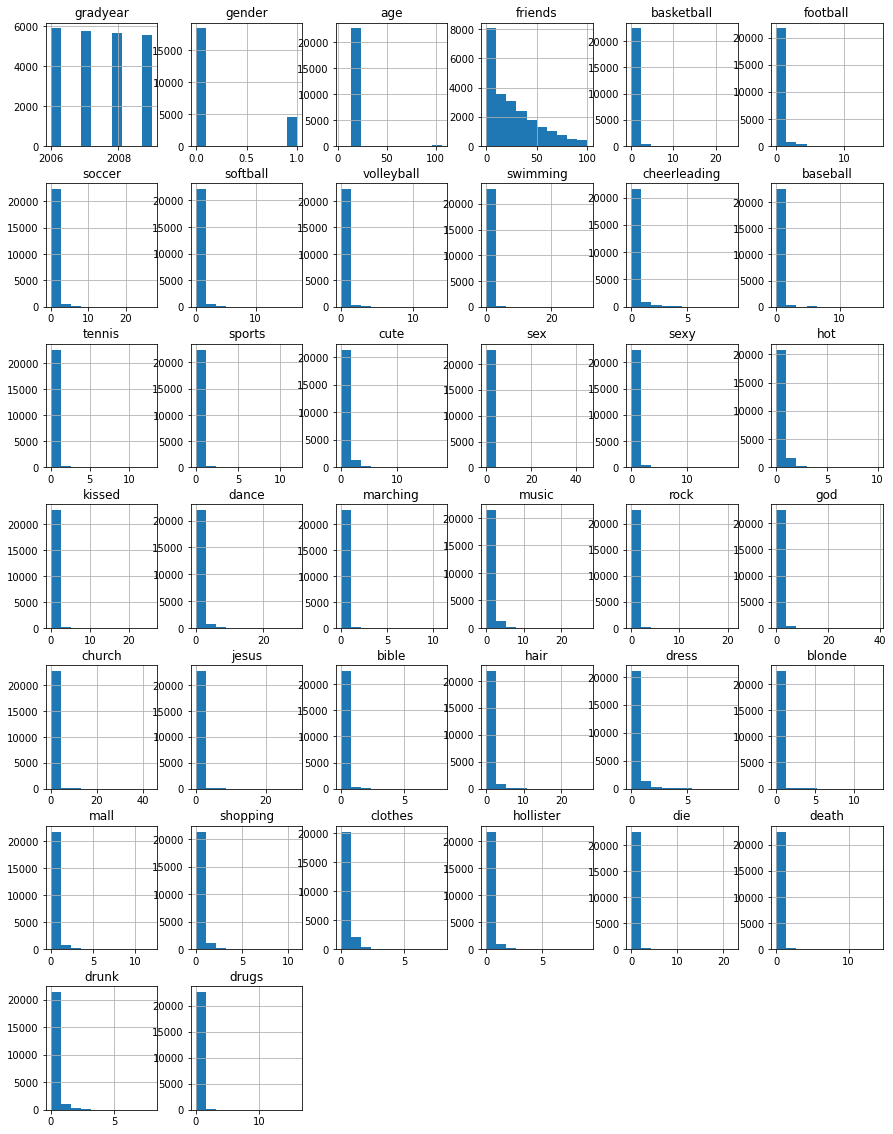

In [416]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax);

## 3. Feature Engineering

Based on your previous conclusions, perform transformations in your features. Think about:  
* Category Encoding
* Outliers & Standardization
* Dimension Reduction
* Discard features that are less relevant to group the data

Why did you choose each method? Please explain your rationale.

In [417]:
# dummie table for gradyear column
df = pd.get_dummies(df, columns=['gradyear'], drop_first=True)

In [418]:
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = StandardScaler()
df_transf = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-4]), columns=df.iloc[:, :-4].columns)

df_final = pd.concat([df_transf, df.iloc[:, -4:].reset_index().drop(columns=['index'])], axis=1)
df_final.head()


,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,die,death,drunk,drugs,gradyear_2007,gradyear_2008,gradyear_2009
0,1.999891,0.133569,-0.748408,-0.337329,-0.367671,-0.243958,-0.221282,-0.219432,-0.257628,-0.204588,-0.205101,-0.170441,-0.304339,-0.40195,-0.230334,-0.269182,-0.265642,-0.203479,0.488762,-0.144927,-0.635803,-0.344003,-0.382580,-0.296505,-0.199397,-0.108763,-0.392771,-0.250817,-0.203685,-0.373407,-0.490028,-0.317917,-0.196228,-0.299977,-0.267033,-0.223697,0,0,0,0
1,-0.500027,0.109868,-1.033079,-0.337329,1.021047,-0.243958,-0.221282,-0.219432,-0.257628,-0.204588,-0.205101,-0.170441,-0.304339,0.83898,-0.230334,-0.269182,-0.265642,-0.203479,-0.364868,-0.144927,1.025299,2.364890,0.432844,-0.296505,-0.199397,-0.108763,5.056736,8.621836,-0.203685,1.063010,-0.490028,-0.317917,-0.196228,-0.299977,-0.267033,-0.223697,0,0,0,0
2,1.999891,0.048845,1.772966,-0.337329,1.021047,-0.243958,-0.221282,-0.219432,-0.257628,-0.204588,-0.205101,-0.170441,-0.304339,-0.40195,-0.230334,-0.269182,-0.265642,-0.203479,-0.364868,-0.144927,0.194748,-0.344003,-0.382580,-0.296505,-0.199397,-0.108763,-0.392771,-0.250817,-0.203685,-0.373407,-0.490028,-0.317917,-0.196228,-0.299977,2.012741,-0.223697,0,0,0,0
3,-0.500027,0.119558,-1.033079,-0.337329,-0.367671,-0.243958,-0.221282,-0.219432,-0.257628,-0.204588,-0.205101,-0.170441,-0.304339,0.83898,-0.230334,-0.269182,-0.265642,-0.203479,-0.364868,-0.144927,-0.635803,1.010443,-0.382580,-0.296505,-0.199397,-0.108763,-0.392771,-0.250817,-0.203685,-0.373407,-0.490028,-0.317917,-0.196228,-0.299977,-0.267033,-0.223697,0,0,0,0
4,-0.500027,0.126760,1.894967,-0.337329,-0.367671,-0.243958,-0.221282,-0.219432,-0.257628,-0.204588,-0.205101,-0.170441,-0.304339,-0.40195,-0.230334,-0.269182,-0.265642,-0.203479,-0.364868,3.217588,-0.635803,-0.344003,-0.382580,-0.296505,-0.199397,-0.108763,-0.392771,-0.250817,-0.203685,2.499426,-0.490028,-0.317917,5.600330,-0.299977,-0.267033,-0.223697,0,0,0,0


In [419]:
# PCA
pca = PCA()
pca.fit(df_final)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

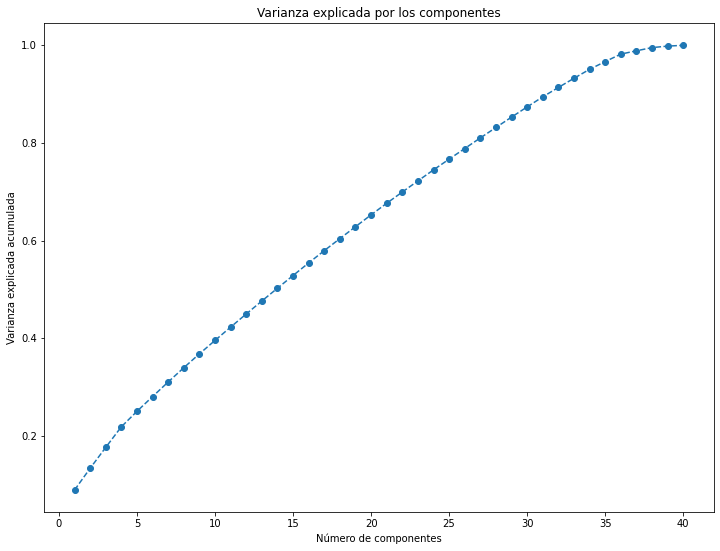

In [420]:
plt.figure(figsize=(12, 9))
plt.plot(range(1, 41), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Varianza explicada por los componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada');

In [421]:
pca = PCA(n_components=27)
d = pca.fit_transform(df_final)
principal_data = pd.DataFrame(data=d)
principal_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,-1.731901,0.781698,-0.679855,-0.224429,-0.565757,-0.047541,-0.086804,-0.544659,-0.119354,0.296844,0.072379,-0.164241,-0.053710,0.026600,0.209513,0.450569,-0.178081,-0.130051,0.220420,0.298670,-0.350646,-0.030392,-0.225588,-0.288086,0.391329,-0.041603,-0.234389
1,3.578625,-0.922483,-0.475506,-1.251270,-1.416983,2.464554,0.546807,-1.167362,-1.444477,3.637198,0.667896,-1.790347,0.634235,-1.326302,1.868661,0.301930,0.447796,-1.678208,-1.267800,-5.503589,-0.512682,1.291308,-0.947013,0.162778,-0.352878,0.446968,0.217686
2,-0.966426,1.199850,-0.324383,0.217176,-0.474839,0.696166,0.958974,-1.004933,0.442464,-1.347256,-0.006920,0.608876,0.544836,0.517526,-0.587349,-0.813991,-0.335571,-0.144960,0.274470,-0.355306,-0.275747,0.454715,0.447046,0.093895,0.106932,-0.853699,-0.209803
3,-1.038410,-0.253734,-0.438736,-0.581625,-0.149287,-0.156249,0.130000,0.570752,-0.041850,0.215977,0.490255,-0.373728,-0.399369,-0.468139,0.561923,-0.010848,0.203550,-0.071346,0.094436,-0.063373,0.042222,-0.539733,0.081530,0.626868,0.139414,-0.503233,-0.167066
4,0.061385,-1.989135,0.337091,0.510703,-1.363377,0.614689,-1.133731,-0.921615,-0.817352,-2.390235,-0.068094,1.946127,-1.582378,0.154847,-3.648531,0.214578,-0.686480,-1.573630,0.602818,-0.870539,-0.132445,-0.471740,-1.903628,-1.696070,0.852792,0.040433,-0.683303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22918,-1.865341,0.866507,-0.785141,-0.196176,-0.489091,-0.385163,-0.272536,-0.499357,-0.128256,0.076126,-0.198291,-0.261915,-0.476275,-0.161476,0.301235,0.301666,0.074730,-0.069160,0.040924,-0.021991,-0.103032,0.140944,-0.146940,-0.178569,0.272581,-0.135791,-0.213704
22919,-1.671942,1.092082,-0.897732,0.345895,-0.811547,-0.413578,-0.118609,-0.728410,-0.201444,0.036046,-0.200287,-0.239088,-0.390849,0.088375,0.270869,0.532241,0.214040,-0.112874,0.079064,-0.095057,-0.065237,0.160997,-0.099863,-0.062989,0.478495,-0.388089,-0.340648
22920,-1.530904,1.539654,-1.073527,0.993040,-1.199186,-0.558676,0.118321,-0.819264,-0.386939,0.025980,-0.135308,-0.001982,-0.412055,0.168060,0.659019,0.178060,0.473930,-0.206445,-0.142859,-0.024842,-0.445899,0.086465,-0.480444,0.362945,0.075990,-0.236219,-0.382161
22921,-1.565644,1.074138,-0.900227,-0.191926,-0.680645,-0.069715,-0.160854,-0.036150,-0.131478,0.014738,-0.015008,-0.383646,-0.528698,-0.377712,0.501504,0.048850,-0.213939,0.005964,0.216599,-0.317975,0.122814,0.024865,-0.236566,-0.199687,0.299696,-0.441044,-0.376549


## 4. Modeling

Now that your data is ready, apply one (or more) unsupervised learning model to find the groups of teens that exist:
* What model did you choose?
* What is the optimal number of clusters?
* Once your clusters are defined, how do you interpret them? - What type of teens there are? What are the differences between them?

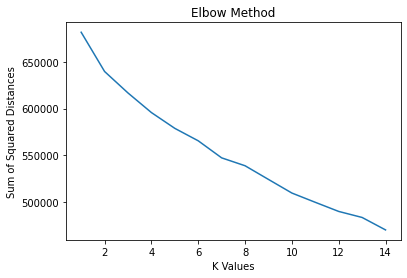

In [422]:
#Your code here:

K = range(1, 15)
sum_squared_distances = []

for k in K:
  model = KMeans(n_clusters=k).fit(principal_data)
  sum_squared_distances.append(model.inertia_)

plt.plot(K, sum_squared_distances)
plt.xlabel('K Values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')

plt.show()



In [423]:
kmeans = KMeans(n_clusters=6, random_state=10)
clusters = kmeans.fit(principal_data)

In [428]:
df['lables'] = clusters.labels_

In [429]:
df['lables'].value_counts()

4    13097
0     4619
2     3822
3      785
1      420
5      180
Name: lables, dtype: int64

In [431]:
df.groupby('lables').agg({'mean'}).T

,lables,0,1,2,3,4,5
gender,mean,0.923577,0.195238,0.017530,0.117197,0.002596,0.244444
age,mean,17.496026,17.453952,17.039541,17.136945,17.318428,101.115878
friends,mean,21.780255,30.433333,34.840921,24.691720,23.834160,23.505556
basketball,mean,0.323014,0.400000,0.550497,0.737580,0.140108,0.200000
football,mean,0.549686,0.252381,0.476452,0.648408,0.081164,0.172222
soccer,mean,0.212167,0.242857,0.437729,0.498089,0.151485,0.222222
softball,mean,0.022732,0.145238,0.344846,0.387261,0.147896,0.088889
volleyball,mean,0.034856,0.169048,0.427263,0.245860,0.091548,0.116667
swimming,mean,0.070795,0.150000,0.327054,0.277707,0.093915,0.166667
cheerleading,mean,0.005845,0.102381,0.320251,0.266242,0.066962,0.038889


In [432]:
df.describe()

,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,die,death,drunk,drugs,gradyear_2007,gradyear_2008,gradyear_2009,lables
count,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000,22923.00000,22923.000000,22923.000000,22923.000000,22923.000000,22923.000000
mean,0.200017,17.961992,25.403176,0.271081,0.264756,0.225538,0.163199,0.143000,0.136021,0.104131,0.111329,0.086289,0.148061,0.323910,0.210182,0.141997,0.126510,0.105571,0.427431,0.043101,0.765519,0.253981,0.469179,0.253021,0.108668,0.020809,0.432448,0.113074,0.088950,0.259957,0.354971,0.151900,0.067705,0.186145,0.117131,0.09039,0.064695,0.252410,0.248048,0.242464,2.779174
std,0.400022,7.636701,24.590312,0.803630,0.720104,0.924513,0.737531,0.651699,0.527984,0.508991,0.542814,0.506279,0.486511,0.805865,0.912529,0.527525,0.476254,0.518841,1.171493,0.297403,1.204047,0.738325,1.226382,0.853364,0.544996,0.191326,1.101041,0.450833,0.436712,0.696192,0.724405,0.477807,0.345040,0.620545,0.438650,0.40408,0.363639,0.434405,0.431889,0.428583,1.614817
min,0.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.318000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,17.300000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,0.000000,18.270000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,4.000000
max,1.000000,106.927000,100.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,13.000000,12.000000,18.000000,45.000000,18.000000,10.000000,26.000000,30.000000,11.000000,27.000000,21.000000,39.000000,44.000000,29.000000,8.000000,27.000000,9.000000,13.000000,12.000000,11.000000,8.000000,9.000000,22.000000,14.000000,8.00000,16.000000,1.000000,1.000000,1.000000,5.000000
